# Sales Prediction using  Python

In the sales prediction project, I loaded data and built a robust prediction model using Python. I interpreted coefficients, performed feature engineering, and employed cross-validation techniques. Conducted correlation analysis and accuracy checks ensured reliable predictions. These steps equipped me to optimize advertising strategies and maximize sales potential for businesses.

Loading the Data

In [2]:
import pandas as pd

# Load the dataset
sales_data = pd.read_csv(r'C:\Users\NIMA\Downloads\advertising.csv')

sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


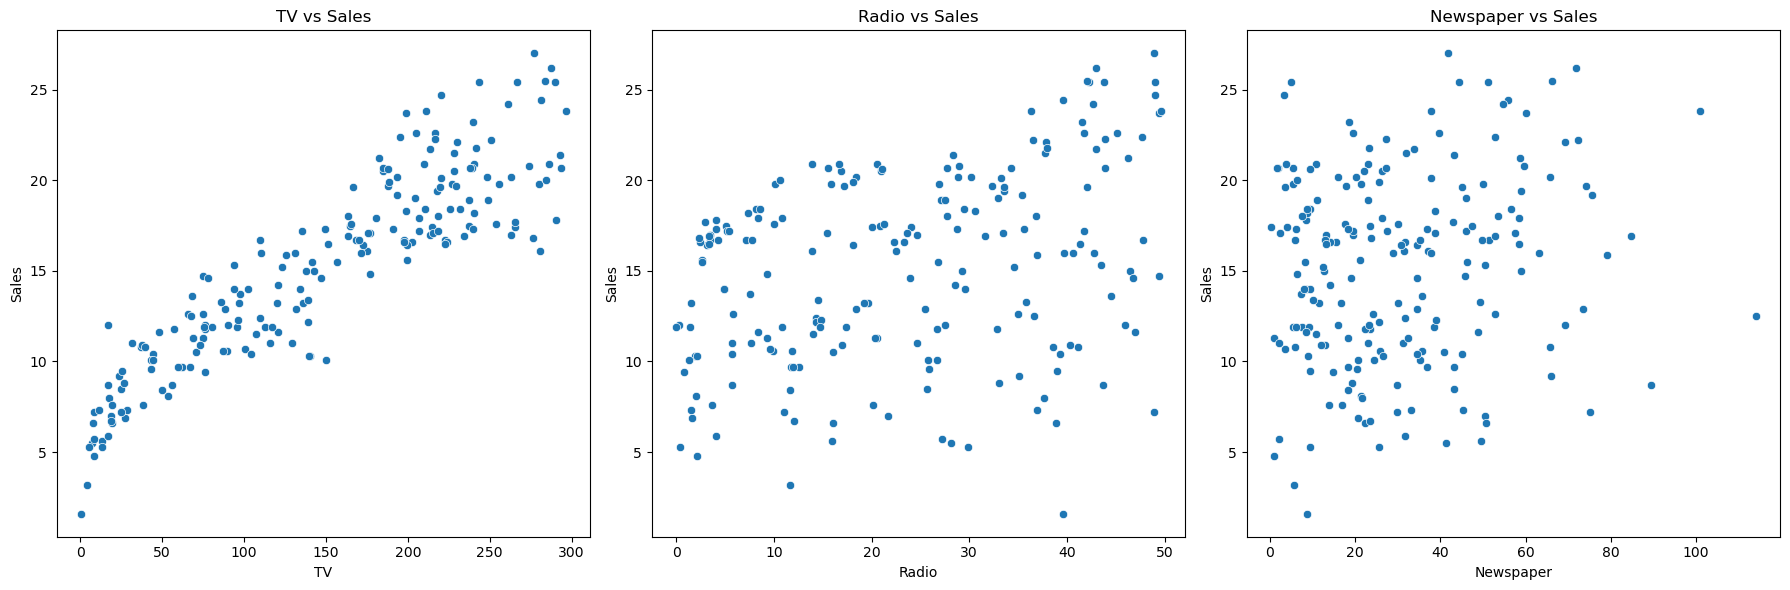

(               TV       Radio   Newspaper       Sales
 count  200.000000  200.000000  200.000000  200.000000
 mean   147.042500   23.264000   30.554000   15.130500
 std     85.854236   14.846809   21.778621    5.283892
 min      0.700000    0.000000    0.300000    1.600000
 25%     74.375000    9.975000   12.750000   11.000000
 50%    149.750000   22.900000   25.750000   16.000000
 75%    218.825000   36.525000   45.100000   19.050000
 max    296.400000   49.600000  114.000000   27.000000,
 TV           0
 Radio        0
 Newspaper    0
 Sales        0
 dtype: int64)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Summary
summary = sales_data.describe()

# Check for Missing Values
missing_values = sales_data.isnull().sum()

# Visualization
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.scatterplot(x='TV', y='Sales', data=sales_data, ax=axes[0])
axes[0].set_title('TV vs Sales')

sns.scatterplot(x='Radio', y='Sales', data=sales_data, ax=axes[1])
axes[1].set_title('Radio vs Sales')

sns.scatterplot(x='Newspaper', y='Sales', data=sales_data, ax=axes[2])
axes[2].set_title('Newspaper vs Sales')

plt.tight_layout()
plt.show()

summary, missing_values

Building a Sales Prediction Model

In [4]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (80% train, 20% test)
X = sales_data[['TV', 'Radio', 'Newspaper']]
y = sales_data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((160, 3), (40, 3))

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Model Building
lm = LinearRegression()
lm.fit(X_train, y_train)

# Predictions on the test set
y_pred = lm.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

mse, rmse, r2

(2.907756910271091, 1.7052146229349228, 0.9059011844150826)

Interpretation of Coefficients

In [6]:
# Getting the coefficients and intercept
coefficients = lm.coef_
intercept = lm.intercept_

coefficients, intercept

(array([0.05450927, 0.10094536, 0.00433665]), 4.714126402214134)

Feature Engineering

In [8]:
# Adding interaction terms
X_train['TV_Radio'] = X_train['TV'] * X_train['Radio']
X_train['TV_Newspaper'] = X_train['TV'] * X_train['Newspaper']
X_train['Radio_Newspaper'] = X_train['Radio'] * X_train['Newspaper']

X_test['TV_Radio'] = X_test['TV'] * X_test['Radio']
X_test['TV_Newspaper'] = X_test['TV'] * X_test['Newspaper']
X_test['Radio_Newspaper'] = X_test['Radio'] * X_test['Newspaper']

# Retrain the model
lm_interaction = LinearRegression()
lm_interaction.fit(X_train, y_train)
y_pred_interaction = lm_interaction.predict(X_test)

# Evaluation
mse_interaction = mean_squared_error(y_test, y_pred_interaction)
rmse_interaction = mse_interaction**0.5
r2_interaction = r2_score(y_test, y_pred_interaction)

mse_interaction, rmse_interaction, r2_interaction

(2.3375960612349305, 1.5289199002024045, 0.9243523349901805)

Cross-validation

In [9]:
from sklearn.model_selection import cross_val_score

# Cross-validation
scores = cross_val_score(lm_interaction, X_train, y_train, cv=5, scoring='r2')
scores.mean(), scores.std()

(0.8907591164460371, 0.029082781031281573)

Correlation Analysis

In [10]:
# Correlation Analysis
correlation_matrix = X_train.corr()
correlation_matrix


,TV,Radio,Newspaper,TV_Radio,TV_Newspaper,Radio_Newspaper
TV,1.000000,0.053872,0.019084,0.643605,0.579901,0.038201
Radio,0.053872,1.000000,0.388074,0.693723,0.283416,0.739060
Newspaper,0.019084,0.388074,1.000000,0.272340,0.718737,0.844269
TV_Radio,0.643605,0.693723,0.272340,1.000000,0.613642,0.518847
TV_Newspaper,0.579901,0.283416,0.718737,0.613642,1.000000,0.610261
Radio_Newspaper,0.038201,0.739060,0.844269,0.518847,0.610261,1.000000


Accuracy Check

In [11]:
from sklearn.metrics import mean_absolute_error

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_interaction)
mae


1.1806635807439716